In [47]:
#import dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
import seaborn as sns 
import random

In [2]:
# # Replace 'YOUR_ACCESS_TOKEN' with your actual Spotify access token
# access_token = "BQBhFAwMYIJBm4nBvc7Rn951IbPWGzhHx44nJ9MSaK7P7FAd03x63QjrKMf6xqX26P7UYH415W__UKuawxy5el-oWdeR4Zg3a3UtBLQezZZtN_d4C1k"

# # Spotify API endpoint for the artist
# url = "https://api.spotify.com/v1/audio-analysis/2A6yzRGMgSQCUapR2ptm6A"

# # Set the headers with the Authorization token
# token = {
#     "Authorization": f"Bearer {access_token}"
# }

# # Make the GET request
# response = requests.get(url, headers=token).json()

# print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# What factors influence the success of a song 

# Presentation 
# Cleaning - Bryan talks about b/c took out null values and added columns
# quantified success with ranking columns combined views/streams and overall rank

# Bryan - youtube vs spotify 

# Coble - Danceability coorelation to overall success, other dancabilit coor

# Paulin - streams and views by album 

# Taylor - success single vs an album, top 100 singles and top 100 albums, if likes or comments have a factor

# Kevals - top youtube videos official vs. unofficial and where falls in overall rank 

# API stuff

#left to do: 

# 4 visuals
# slides - frame for the slides 

#Next Steps - Bryan is going to create skeleton powerpoint

In [4]:
data = "./resources/Spotify_Youtube.csv"
spot_yt_df = pd.read_csv(data)

In [5]:
#clean DF for analysis and add new columns
spot_yt_df["Views"] = spot_yt_df["Views"].fillna(0)
spot_yt_df["Stream"] = spot_yt_df["Stream"].fillna(0)
spot_yt_df["Danceability"] = spot_yt_df["Danceability"].fillna(0)


#remove duplicate tracks
spot_yt_df = spot_yt_df.drop_duplicates(subset= "Track", keep= "first")

# Add "Views" and "Stream" together and create a new column "Combined Data"
spot_yt_df['Combined Views and Streams'] = (spot_yt_df['Stream'] + spot_yt_df['Views'])


spot_yt_df['YouTube Rank'] = spot_yt_df['Views'].rank(ascending=False, method='min')
spot_yt_df['Spotify Rank'] = spot_yt_df['Stream'].rank(ascending=False, method='min')
spot_yt_df['Overall Rank'] = spot_yt_df['Combined Views and Streams'].rank(ascending=False, method='min')



spot_yt_df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Likes,Comments,Description,Licensed,official_video,Stream,Combined Views and Streams,YouTube Rank,Spotify Rank,Overall Rank
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,1.733790e+09,396.0,258.0,273.0
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,3.820954e+08,4084.0,1872.0,2515.0
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,7.149852e+07,9940.0,7405.0,8951.0
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,6.464185e+08,1743.0,1223.0,1359.0
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,1.235741e+09,483.0,703.0,519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06,9.298822e+06,16326.0,14640.0,15556.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07,1.106292e+07,15764.0,14253.0,15261.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06,6.261756e+06,16664.0,15411.0,16166.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06,6.880494e+06,17137.0,15264.0,16053.0


In [6]:
#YT views vs spotify streams - Bryan
yt_vs_spotify = spot_yt_df[["Artist", "Track", "Album", "Views", "Stream", "Combined Views and Streams", "YouTube Rank", "Spotify Rank", "Overall Rank"]]

# Sort the DataFrame by "Combined Views and Streams" in descending order
yt_vs_spotify = yt_vs_spotify.sort_values(by="Combined Views and Streams", ascending=False).reset_index(drop=True)

# Convert the DataFrame to string type
yt_vs_spotify = yt_vs_spotify.astype(str)

yt_vs_spotify

# top 20 youtube, top 20 spotify, top 20 combined 
# coorelation coeff between youtube to spotify streams
# unique tracks - change at top 
# 1 stream on spotify 

,Artist,Track,Album,Views,Stream,Combined Views and Streams,YouTube Rank,Spotify Rank,Overall Rank
0,Daddy Yankee,Despacito,VIDA,8079646911.0,1506598267.0,9586245178.0,1.0,78.0,1.0
1,Ed Sheeran,Shape of You,÷ (Deluxe),5908398479.0,3362005201.0,9270403680.0,2.0,2.0,2.0
2,Wiz Khalifa,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),5773797147.0,1521254554.0,7295051701.0,3.0,73.0,3.0
3,Mark Ronson,Uptown Funk (feat. Bruno Mars),Uptown Special,4821016218.0,1653819736.0,6474835954.0,5.0,51.0,4.0
4,Ed Sheeran,Thinking out Loud,x (Wembley Edition),3547155867.0,2154334378.0,5701490245.0,10.0,14.0,5.0
...,...,...,...,...,...,...,...,...,...
17836,D.O.E.,Talk to Em,Friendly Reminder,0.0,0.0,0.0,17444.0,17310.0,17821.0
17837,Christian Rode,Kapitel 1.1 - Sindbad der Seefahrer,Sindbad der Seefahrer,0.0,0.0,0.0,17444.0,17310.0,17821.0
17838,Santiago Ziesmer,Kapitel 3.3 & Kapitel 4.1 - Die kleine Hexe - ...,Die kleine Hexe - Das Hörspiel,0.0,0.0,0.0,17444.0,17310.0,17821.0
17839,Peter Groeger,Kapitel 2.2 - Der Kaiser von Dallas,Der Kaiser von Dallas (Die einzige Wahrheit üb...,0.0,0.0,0.0,17444.0,17310.0,17821.0


In [57]:
#15 most danceable and streamed on YT and Spot
#15 most overall popular songs on spot and YT
#data frame for danceability against popularity - Coble
dance_pop_df = spot_yt_df[["Artist", "Track", "Album", "Danceability", "Views", "Stream", "Tempo", "Energy", "Combined Views and Streams", "Overall Rank"]]

dance_pop_df = dance_pop_df.sort_values(by=['Danceability'], ascending=[False])

dance_pop_df.reset_index(drop=True).head(50)

# Want to graph
# Danceability doesn't necessarily correlate with overall rank
# Frequency of top artists for danceability

,Artist,Track,Album,Danceability,Views,Stream,Tempo,Energy,Combined Views and Streams,Overall Rank
0,BIA,CAN'T TOUCH THIS,FOR CERTAIN (Deluxe),0.975,4.497077e+06,2.476934e+07,125.953,0.482,2.926641e+07,12590.0
1,Dave,Funky Friday,Funky Friday,0.975,9.050163e+07,1.721778e+08,125.066,0.535,2.626794e+08,3611.0
2,Timbaland,Give It To Me,Shock Value,0.975,1.331471e+08,1.652860e+08,110.621,0.711,2.984331e+08,3216.0
3,Xavier Wulf,Psycho Pass,Blood Shore Season 2,0.973,1.025647e+07,1.099011e+08,115.039,0.446,1.201576e+08,6641.0
4,Juicy J,RIP Young (feat. Project Pat & Juicy J) - Remix,The House Is Burning [homies begged],0.971,3.398625e+06,7.701677e+06,120.073,0.662,1.110030e+07,15250.0
5,DaBaby,Baby (Lil Baby feat. DaBaby),Quality Control: Control The Streets Volume 2,0.970,1.348591e+08,3.895709e+08,108.003,0.463,5.244300e+08,1733.0
6,Tech N9ne,Like I Ain't,N9NA,0.970,2.823677e+07,7.067657e+07,116.030,0.710,9.891334e+07,7497.0
7,Kelis,Trick Me - Club Mix,Tasty,0.970,6.906310e+07,0.000000e+00,107.166,0.738,6.906310e+07,9066.0
8,Dina Rae,Let Go,Let Go,0.969,2.592000e+03,0.000000e+00,113.032,0.511,2.592000e+03,17779.0
9,Super Simple Songs,If You're Happy,The Bath Song & More Kids Songs,0.968,8.892614e+08,2.990458e+07,114.892,0.257,9.191660e+08,817.0


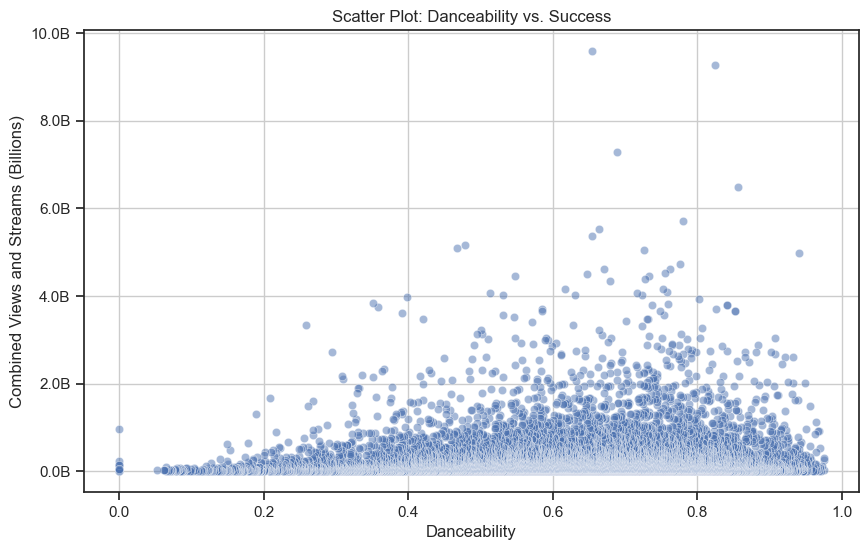

In [54]:
# Function to format numbers in billions
def billions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'  # Format numbers in billions with one decimal place

# Assuming you have a DataFrame named dance_pop_df with 'Danceability' and 'Combined Views and Streams' columns

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data=dance_pop_df, x='Danceability', y='Combined Views and Streams', alpha=0.5)

# Customize y-axis labels to use the custom billions_formatter
y_formatter = FuncFormatter(billions_formatter)
scatterplot.yaxis.set_major_formatter(y_formatter)

plt.title('Scatter Plot: Danceability vs. Success')
plt.xlabel('Danceability')
plt.ylabel('Combined Views and Streams (Billions)')

plt.grid(True)
plt.show()

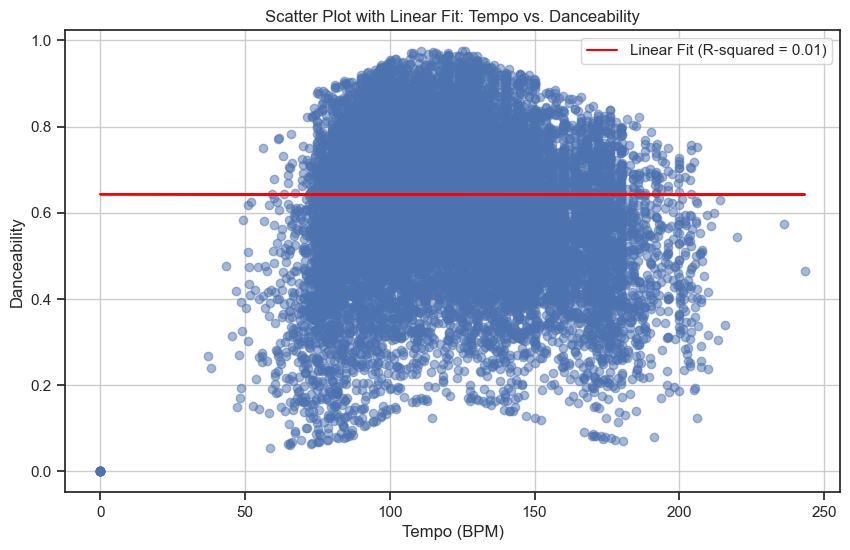

In [55]:
# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(dance_pop_df['Overall Rank'], dance_pop_df['Danceability'])

# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(dance_pop_df['Tempo'], dance_pop_df['Danceability'], marker='o', alpha=0.5)
plt.plot(dance_pop_df['Tempo'], intercept + slope * dance_pop_df['Tempo'], color='red', linestyle='-', label=f'Linear Fit (R-squared = {r_value**2:.2f})')
plt.title('Scatter Plot with Linear Fit: Tempo vs. Danceability')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Danceability')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Assuming you have the DataFrame dance_pop_df with columns 'Energy', 'Danceability', 'Artist', 'Stream', and 'Views'

# Filter the DataFrame to select rows where Danceability is between 0.6 and 1
filtered_df = dance_pop_df[(dance_pop_df['Danceability'] >= 0.6) & (dance_pop_df['Danceability'] <= 1)]

# Count the frequency of each artist
artist_counts = filtered_df['Artist'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Frequency']

# Group by the 'Artist' column and sum the 'Stream' and 'Views' columns
grouped_df = filtered_df.groupby('Artist').agg({'Stream': 'sum', 'Views': 'sum', 'Energy': 'mean'}).reset_index()

# Exclude artists that appear only once
grouped_df = grouped_df[grouped_df['Stream'] > 1]

# Calculate the 'Success' column as the sum of 'Stream' and 'Views'
grouped_df['Success'] = grouped_df['Stream'] + grouped_df['Views']

# Merge the 'Frequency' column back into the grouped DataFrame
result_df = grouped_df.merge(artist_counts, on='Artist', how='left')

# Rename the columns for clarity
result_df.columns = ['Artist', 'Combined Stream', 'Combined Views', 'Energy', 'Success', 'Frequency']

# Sort the result DataFrame by 'Frequency' in descending order
result_df = result_df.sort_values(by='Frequency', ascending=False)

# Add a 'Dance Artist Rank' column based on the 'Success' column
result_df['Dance Artist Rank'] = result_df['Success'].rank(ascending=False, method='dense').astype(int)

# Sort the result DataFrame by 'Dance Artist Rank' in ascending order
result_df = result_df.sort_values(by='Frequency', ascending=False)

# Reset the index after sorting
result_df = result_df.reset_index(drop=True).astype(str)

# Print the sorted and indexed DataFrame
result_df

,Artist,Combined Stream,Combined Views,Energy,Success,Frequency,Dance Artist Rank
0,Bone Thugs-N-Harmony,587756809.0,428752060.0,0.602,1016508869.0,10,637
1,YSY A,347525092.0,257929729.0,0.7169,605454821.0,10,931
2,Flo Rida,5174460576.0,3351876105.0,0.8042,8526336681.0,10,31
3,Akon,2475948892.0,4411728077.0,0.6599999999999999,6887676969.0,10,52
4,AP Dhillon,1110345507.0,1166886877.0,0.5522,2277232384.0,10,286
...,...,...,...,...,...,...,...
1845,Robbie Williams,201457474.0,249074.0,0.762,201706548.0,1,1439
1846,creamy,2128790.0,4251188.0,0.501,6379978.0,1,1823
1847,Javier Solís,32543303.0,14963387.0,0.664,47506690.0,1,1726
1848,Sarah McLachlan,14231737.0,34086587.0,0.353,48318324.0,1,1722


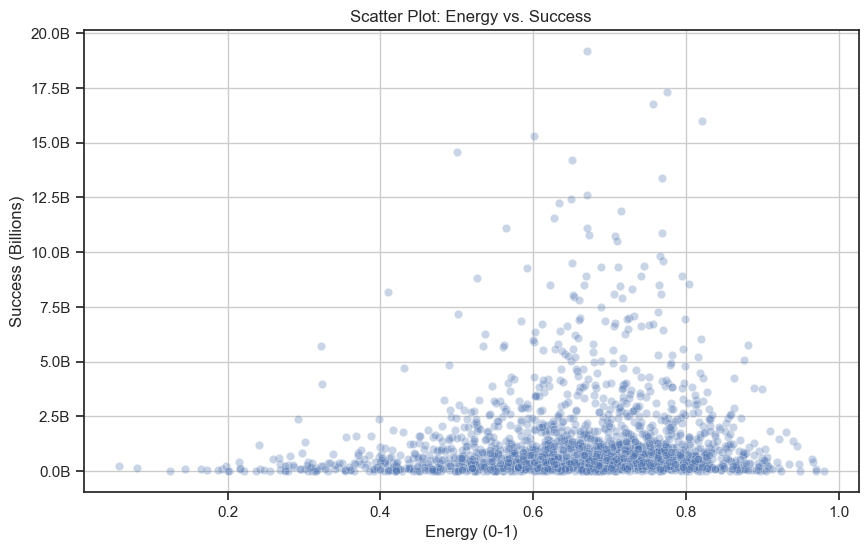

In [48]:
# Function to format numbers in billions
def billions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'  # Format numbers in billions with one decimal place

# Assuming you have a DataFrame named result_df with 'Energy' and 'Success' columns

# Randomly select a subset of data points (e.g., 1000 data points)
subset_size = 1850
subset_df = result_df.sample(n=subset_size, random_state=42)

# Create a scatterplot for 'Energy' vs. 'Success'
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data=subset_df, x='Energy', y='Success', alpha=0.3, marker='o', edgecolors='k')

# Customize y-axis labels to use the custom billions_formatter
scatterplot.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Set plot labels and title
plt.title('Scatter Plot: Energy vs. Success')
plt.xlabel('Energy (0-1)')
plt.ylabel('Success (Billions)')

plt.grid(True)
plt.show()


In [ ]:
#album with the most streams on spot - Paulin
most_streams = spot_yt_df[["Album", "Stream"]]
most_streams = most_streams.sort_values("Stream", ascending=False)
#group Streams by Album
grouped_df = most_streams.groupby('Album')["Stream"].sum().reset_index()
grouped_df.sort_values("Stream", ascending=False).astype(str)
#group Views by Album
most_views = spot_yt_df[["Album", "Views"]]
grouped_view_df = most_views.groupby('Album')["Views"].sum().reset_index()
grouped_view_df.sort_values("Views", ascending=False).astype(str)
#Merge
combined_df = pd.merge(grouped_df, grouped_view_df, on='Album')
combined_df.sort_values("Stream", ascending=False).astype(str) 


#spot_yt_df['Combined Views and Streams'] = (spot_yt_df['Stream'] + spot_yt_df['Views'])


# found the top 10 albums for most streams and views 
# visualization and show the bar chart of the top 10 
# combined value for stream and views per Album 

In [ ]:
#Success of a single vs an album - Taylor
single_album = spot_yt_df[["Artist", "Track", "Album", "Album_type", "Stream", "Views"]]
#check by stream, view, comment, likes, to help determine

#Success of single vs an album by Stream
album_df = spot_yt_df[["Artist", "Track", "Album_type", "Stream", "Views", "Comments", "Likes"]]
album_df = album_df.sort_values("Stream", ascending=False).astype(str)
album_df.rename(columns={"Album_type": "Track_Origin"}, inplace=True)
album_df.head(10)

In [ ]:
#Success of single vs album by Views
album_df = spot_yt_df[["Artist", "Track", "Album_type", "Stream", "Views", "Comments", "Likes"]]
album_df = album_df.sort_values("Views", ascending=False).astype(str)
album_df.rename(columns={"Album_type": "Track_Origin"}, inplace=True)
album_df.head(10)

In [ ]:
#Success of single vs album by comments
album_df = spot_yt_df[["Artist", "Track", "Album_type", "Stream", "Views", "Comments", "Likes"]]
album_df = album_df.sort_values("Comments", ascending=False).astype(str)
album_df.rename(columns={"Album_type": "Track_Origin"}, inplace=True)
album_df.head(10)

In [ ]:
#success of single vs album by likes
album_df = spot_yt_df[["Artist", "Track", "Album_type", "Stream", "Views", "Comments", "Likes"]]
album_df = album_df.sort_values("Likes", ascending=False).astype(str)
album_df.rename(columns={"Album_type": "Track_Origin"}, inplace=True)
album_df.head(10)

In [ ]:
#offical video success against non official videos - compared to spotify track - Keval
df = spot_yt_df[["Artist", "Track", "Stream", "Views", "official_video"]]

official_video_df = df.rename(columns={'Stream': 'Spotify Stream','Views':'Youtube Views','official_video':'Official Video'})

official_sorted_stream = official_video_df.sort_values(by = "Spotify Stream", ascending = False).reset_index(drop=True)

top_100_streamed_songs = official_sorted_stream.head(100)

# Count the occurrences of 'Official Video' values
true_false_count = top_100_streamed_songs["Official Video"].value_counts().reset_index()

# Create a bar plot with two bars for 'Official Songs' and 'Non-Official Songs'
bars = plt.bar(true_false_count["index"], true_false_count["Official Video"], color=['blue', 'green'], width=0.25, align='center')

# Set the legend labels for each bar
bars[0].set_label("Official Songs")
bars[1].set_label("Non-Official Songs")

# Create the legend
plt.legend()

# Modify the tick labels to match the legend labels
tick_location = [value for value in true_false_count["index"]]
plt.xticks(tick_location, ["Official Songs", "Non-Official Songs"])

plt.title("Official and Non-Official Songs in Top 100 Streamed Songs")
plt.ylabel("Top 100 Streamed Songs Count")
plt.xlabel("Official or Non-Official Song")

plt.show()

# non official song is without a label 
# what were the name of the songs that were not official
# One Dance by Drake, Lucid Dreams Juice World,

In [ ]:
#Licensed song success against unLicensed video - compared to spotify track - Anyone
licensed_song = spot_yt_df[["Artist", "Track", "Stream", "Views", "Licensed"]]

licensed_song_df = licensed_song.rename(columns={'Stream': 'Spotify Stream','Views':'Youtube Views'})
licensed_sorted_stream = licensed_song_df.sort_values(by = "Spotify Stream", ascending = False).reset_index(drop=True)

top_100_licensed_unlicensed_songs = licensed_sorted_stream.head(100)


true_false_count_licensed = top_100_licensed_unlicensed_songs["Licensed"].value_counts().reset_index()
plt.bar(true_false_count_licensed["index"], top_100_licensed_unlicensed_songs["Licensed"].value_counts(), color=['blue', 'green'], width= 0.25,align='center')

tick_location = [value for value in true_false_count["index"]]
plt.xticks(tick_location, ["Licensed Song", "Non-Licensed Song"])

# count.plot(kind='bar')
plt.legend(["Licensed Songs","Non-Licensed Song"])
plt.title("Licensed and Non-Licensed Songs in Top 100 Streamed Songs")
plt.ylabel("Top 100 Streamed songs")
plt.xlabel("Licensed or Non-Licensed Song")

In [ ]:
#API: Genre against popularity for Spotify - Keval